<img align="right" width="250" src="http://www.sobigdata.eu/sites/default/files/logo-SoBigData-DEFINITIVO.png">
**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

<img align="right" width="250" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Cluster-2.svg/601px-Cluster-2.svg.png">

# Clustering with Python

This notebook contains an overview of basic python functionalities for clustering using the [sklearn](http://scikit-learn.org/stable/) library.  
Note: this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started.

Import of the basic packages to use

In [1]:
#Configurazione 3
%matplotlib inline   
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#RIMPIAZZANDO I PREZZI
df = pd.read_csv('training.csv') 

#REPLACE MISSING VALUES & OUTLIERS in un colpo solo...
#Rimpiazzo gli 0 e 1 dei valori di MMR con np.nan e poi rimpiazzo con la media fatta rispetto a, dapprima Make, Model e SubModel
#(di cui se ne trovano la maggior parte), poi Make e Model, e poi Make per i pochi rimasti
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].replace(0, np.nan)
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].replace(1, np.nan)

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].replace(0, np.nan)
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].replace(1, np.nan)

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].replace(0, np.nan)
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].replace(1, np.nan)

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].replace(0, np.nan)
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].replace(1, np.nan)

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].replace(0, np.nan)
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].replace(1, np.nan)

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].replace(0, np.nan)
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].replace(1, np.nan)

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].replace(0, np.nan)
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].replace(1, np.nan)

df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].replace(0, np.nan)
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].replace(1, np.nan)

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

#Sostituzione missing values colonna TopThreeAmericanName
df.loc[15769,'TopThreeAmericanName']='GM' 
df.loc[18532,'TopThreeAmericanName']='CHRYSLER'
df.loc[20016,'TopThreeAmericanName']='CHRYSLER'
df.loc[35157,'TopThreeAmericanName']='CHRYSLER'

#Rimpiazzo i valori nulli di Nationality con AMERICAN perche' i 4 che mancavano di TopThreeAmericanName erano tutti americani
df['Nationality'] = df['Nationality'].fillna('AMERICAN')

#IMPORTANTE: Siccome le righe con valori nulli di Color e SubModel sono gli stessi (e sono solo 7) li togliamo:
df=df.dropna(subset=['SubModel', 'Color']) 

#Rimpiazzati i missing values di Transmission (con la moda fra le macchine dello stesso modello (e stesso Make))
df['Transmission'] = df['Transmission'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mode()[0])) #faccio la moda perche' sono 'Transimission' stringhe

#Convertito la colonna Trim a stringa (c'erano dei valori interi che impedivano di calcolare la moda)
df['Trim']=df['Trim'].astype(str) 
df['Trim'] = df['Trim'].replace('nan', np.nan)
#Rimpiazzato i missing values della colonna Trim con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
df['Trim'] = df.groupby(['Make','Model', 'SubModel']).Trim.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['Trim'] = df.groupby(['Make','Model']).Trim.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['Trim'] = df.groupby('Make').Trim.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)

#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make Model (molto precisa)
df['WheelType']=df['WheelType'].astype(str) 
df['WheelType'] = df['WheelType'].replace('nan', -5)
#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
#df['WheelType'] = df.groupby(['Make','Model','SubModel']).WheelType.apply(
  #  lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)
#df['WheelType'] = df.groupby(['Make','Size']).WheelType.apply(
 #   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)
#df['WheelType'] = df.groupby('Make').WheelType.apply(
#    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)


#eliminiamo Primeunit e AUCGUART perche' mancano 55703 valori
df = df.drop(['PRIMEUNIT', 'AUCGUART'], axis=1)

#eliminiamo BYRNO, RefId, VNZIP1 e WheelTypeID perche' non forniscono informazione
df = df.drop(['BYRNO', 'RefId','WheelTypeID'], axis=1)

#Togliamo le righe che hanno Size o Trim np.nan (4 di Size e 1 di Trim)
df=df.dropna(subset=['Size','Trim'])

#Outlier: c'e' un valore di VehBCost uguale a 1. Lo trattiamo come un outlier sostituendolo con la media fatta raggruppando su Make e Model
df['VehBCost'] = df['VehBCost'].replace(1, np.nan)
df['VehBCost'] = df['VehBCost'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df=df[df['VehicleAge']>0] #Tolgo una riga con VehicleAge=0 sennò non posso calcolare MilesPerYear
#Aggiunta di una nuova colonna
df['MilesPerYear'] = df['VehOdo'] / df['VehicleAge']




#------------------------------------------------- KMeans ------------------------------------------------------------
#1) eliminare i categorici con pochi valori per vedere se SSE si abbassa; eliminare IsOnlineSale, VehYear. fare KMeans con Z-score e salvare l'immagine

#2) provare MiniMax e salvare l'immagine

#3) scegliere un k e una normalizzazione (cio' che minimizza SSE) e concentrarsi su quelli.

#4) eseguire  (rivedere il codice...)
#kmeans = KMeans(n_clusters=__ktrovato__, n_init=10, max_iter=300)
#kmeans.fit(X)
#kmeans.labels_[:5]
#np.unique(kmeans.labels_, return_counts=True)
#hist, bins = np.histogram(kmeans.labels_, 
#                          bins=range(0, len(set(kmeans.labels_)) + 1))
#dict(zip(bins, hist))

#5) stampare SSE e Silhouette_Score

#6) stampare tutti i grafici per tutte le coppie 
#for column1 in df:
#    for column2 in range(column1 + 1, len(df)): 
#        plt.scatter(df['sepal length'], df['petal width'], 
#                    c=kmeans.labels_, s=20)
#        plt.tick_params(axis='both', which='major', labelsize=22)
#        plt.show()

#--------------------------------------------------DBSCAN ------------------------------------------------------
#1) togliere i categorici e quelli tolti in KMeans
#2) provare min_sample da 5 a 100 a passi di 5 e salvare il grafico.
#3) a mano ricavare il best eps dal grafico (non si puo' automatizzare)
#4) stampare silhouette_coeff per ogni risultato
#5) trovare best silhouette_coeff e tenere la coppia (eps, min_sample) con il migliore silhouette_coeff
#6) trovato la best coppia (eps, min_sample) fare i cluster di tutte le coppie

#-------------------------------------------------- Hierarcical -------------------------------------------------

#1)studiare

In [2]:
df['DiffAcquisition_CurrentRetailAveragePrice']=df['MMRAcquisitionRetailAveragePrice']-df['MMRCurrentRetailAveragePrice']
df['VehBCost_f_VehicleAge'] = df['VehBCost']/ df['VehicleAge']
df['DiffAcquisition_CurrentAuctionAveragePrice']=df['MMRAcquisitionAuctionAveragePrice']-df['MMRCurrentAuctionAveragePrice']
df['DiffAcquisition_CurrentAuctionCleanPrice']=df['MMRAcquisitionAuctionCleanPrice']-df['MMRCurrentAuctionCleanPrice']

In [3]:
#------------------------------------------- CLUSTERING -------------------------------------------------------------

#eliminazione classe da predire
classes = df['IsBadBuy'] 
del df['IsBadBuy']

#sostituzione attributi non numerici con attributi numerici, e cancellazione delle colonne non utili per il cluster
del df['PurchDate']
del df['SubModel'] #son troppi
del df['Model']
del df['Nationality']
del df['TopThreeAmericanName']
del df['VNST']
del df['Color']
del df['Trim']
del df['Auction'] #son troppi
del df['Make']
del df['Size']
del df['Transmission']
 #del df['WheelType']
del df['IsOnlineSale']
del df['VehYear']
del df['MilesPerYear']
del df['MMRAcquisitionAuctionAveragePrice'] 
del df['MMRAcquisitionAuctionCleanPrice'] 
del df['MMRAcquisitionRetailAveragePrice']
del df['MMRAcquisitonRetailCleanPrice']
del df['MMRCurrentAuctionAveragePrice']
del df['MMRCurrentAuctionCleanPrice']
del df['MMRCurrentRetailAveragePrice']
del df['MMRCurrentRetailCleanPrice']
del df['VehicleAge']
del df['VehBCost']
del df['WarrantyCost']
del df['VNZIP1']

In [4]:
df.loc[df['WheelType']=="Alloy", 'WheelType']= 1
df.loc[df['WheelType']=="Covers", 'WheelType']= 2
df.loc[df['WheelType']=="Special", 'WheelType']= 3

In [5]:
df.head()

,WheelType,VehOdo,DiffAcquisition_CurrentRetailAveragePrice,VehBCost_f_VehicleAge,DiffAcquisition_CurrentAuctionAveragePrice,DiffAcquisition_CurrentAuctionCleanPrice
0,2,61184,535.0,3050.000000,168.0,20.0
1,2,92383,0.0,1333.333333,0.0,0.0
2,2,45965,352.0,3750.000000,570.0,478.0
3,2,80169,0.0,1181.250000,0.0,0.0
4,1,77372,64.0,1417.500000,60.0,-178.0


In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Primo tipo di normalizzazione: Z-Score 
#scaler = StandardScaler()
#X = scaler.fit_transform(df.values)

#Secondo metodo di normalizzazione: MiniMax
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)

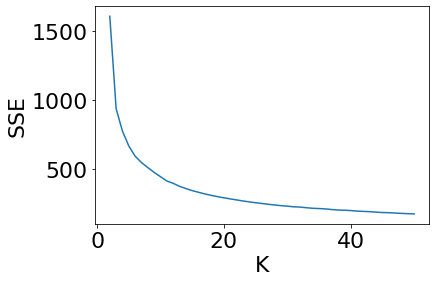

1040 seconds needed


In [7]:
# -------------------------------------------------- KMeans ------------------------------------------------------------

#Lanciamo 50 volte l'algoritmo KMeans e salviamo su file la lista delle 50 sse
#corrispondenti ai vari k con la normalizzazione MiniMax
from datetime import datetime

start = datetime.now()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
fp1 = open('sse_list_MinMax_n.txt', 'w')

for i in range(len(sse_list)):
    if(i != len(sse_list) - 1):
        fp1.write(str(sse_list[i]) + ', ')
    else:
        fp1.write(str(sse_list[i]))
        
fp1.close()

plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

end = datetime.now()
print( "{} seconds needed".format((end - start).seconds))

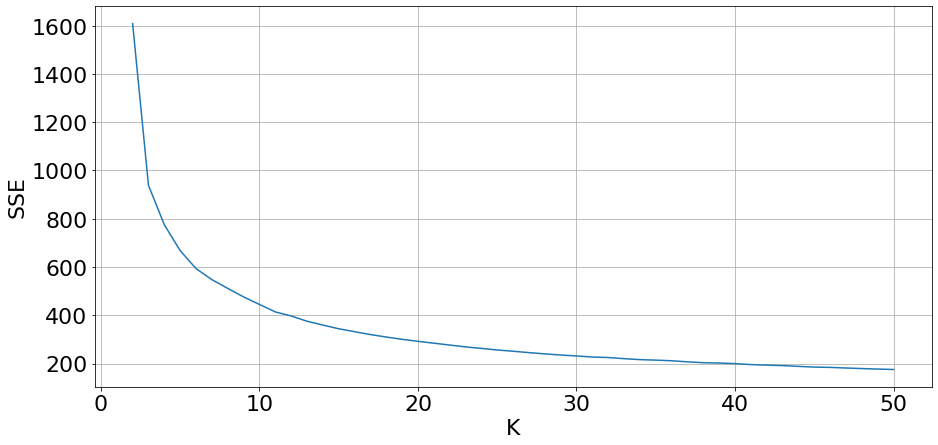

In [8]:
#Leggiamo dal file la lista delle sse con normalizzazione MiniMax e stampiamo il grafico

import matplotlib.pyplot as plt
import numpy as np

fp = open('sse_list_MinMax_n.txt', 'r')
sse_list_string = fp.readline().split(',')

sse_list = []
for element in sse_list_string:
    sse_list.append(float(element))
    
x = range(2, len(sse_list) + 2)
y = sse_list

plt.figure(figsize = (15, 7))
plt.plot(x,y)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 938.1850116321745
Silhouette 0.3937142963695957


In [10]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 775.1319772415609
Silhouette 0.2835314519661087


In [11]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 667.5912088588756
Silhouette 0.3091567478299411


In [12]:
kmeans = KMeans(n_clusters=6, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 593.4120565302084
Silhouette 0.30984409487004355


In [13]:
kmeans = KMeans(n_clusters=7, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 547.6507096927905
Silhouette 0.30331456430075227


In [14]:
kmeans = KMeans(n_clusters=8, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 511.22984746684955
Silhouette 0.3089238050378675


In [15]:
kmeans = KMeans(n_clusters=9, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 476.0014451424565
Silhouette 0.31158326515242013


In [16]:
kmeans = KMeans(n_clusters=10, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 444.88134478506817
Silhouette 0.30012166420533554


In [17]:
kmeans = KMeans(n_clusters=11, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 413.89997784438435
Silhouette 0.2878379113589099


In [18]:
kmeans = KMeans(n_clusters=12, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 394.2051354964373
Silhouette 0.29060442493757904


In [19]:
kmeans = KMeans(n_clusters=13, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 375.3238385599236
Silhouette 0.277223301444479


In [ ]:
kmeans = KMeans(n_clusters=14, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 359.3964028344212


In [ ]:
kmeans = KMeans(n_clusters=15, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

In [ ]:
kmeans = KMeans(n_clusters=16, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

In [ ]:
kmeans = KMeans(n_clusters=17, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

In [ ]:
#VehicleAge, VehOdo, VehBCost, WarrantyCost, AcquisitionAveragePrice, CurrentAveragePrice
'''
varlist=['VehBCost','AcquisitionAveragePrice','VehicleAge', 'VehOdo','WarrantyCost', 'CurrentAveragePrice']
for i in range (len(varlist)):
    for j in range (i+1,len(varlist)):
        plt.scatter(df[varlist[i]], df[varlist[j]], c=kmeans.labels_, s=20)
        plt.xlabel(varlist[i])
        plt.ylabel(varlist[j])
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.show() 
'''        

In [ ]:
#Grafici di tutti i min_samples e k (prima bisogna avere già X normalizzata con Z-Score o MinMax)

from datetime import datetime
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform

start = datetime.now()

dist = pdist(X) #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

for k in range (5,100,5):
    kth_distances = list()
    for d in dist:
            index_kth_distance = np.argsort(d)[k]
            kth_distances.append(d[index_kth_distance])
    k1= str(k)
    fp2 = open('kth_distances_with_minsamples_MiniMax_n'+k1+'.txt', 'w')
    for i in range(len(kth_distances)):
        if(i != len(kth_distances) - 1):
            fp2.write(str(kth_distances[i])+', ')
        if(i == len(kth_distances) - 1):
            fp2.write(str(kth_distances[i]))        

    fp2.close()
    
end = datetime.now()
print( "{} seconds needed".format((end - start).seconds))

In [ ]:
#Ginocchio per DBSCAN minsamples = 5

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n5.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 5th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 10

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n10.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 10th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.06, min_samples=10)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 15

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n15.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 15th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.06, min_samples=15)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 20

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n20.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 20th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.065, min_samples=20)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 25

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n25.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 25th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.065, min_samples=25)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 30

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n30.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 30th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.07, min_samples=30)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 35

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n35.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 35th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.07, min_samples=35)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 40

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n40.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 40th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.075, min_samples=40)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 45

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n45.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 45th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.08, min_samples=45)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 50

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n50.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 50th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.085, min_samples=50)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 55

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n55.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 55th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.09, min_samples=55)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 60

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n60.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 60th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.09, min_samples=60)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 65

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n65.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 65th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.095, min_samples=65)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 70

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n70.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 70th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.095, min_samples=70)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 75

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n75.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 75th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.10, min_samples=75)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 80

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n80.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 80th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.10, min_samples=80)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 85

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n85.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 85th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.10, min_samples=85)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 90

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n90.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 90th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.10, min_samples=90)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
#Ginocchio per DBSCAN minsamples = 95

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_n95.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 95th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
'''
dbscan = DBSCAN(eps=0.10, min_samples=95)
dbscan.fit(X)
np.unique(dbscan.labels_, return_counts=True)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
'''

In [ ]:
'''
# --------------------------------------------------- Hierarchical --------------------------------------------------

from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

start = datetime.now()
'''

In [ ]:
'''
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

end = datetime.now()
print( "{} seconds needed".format((end - start).seconds))
'''

In [ ]:
'''
start = datetime.now()

res = dendrogram(data_link, color_threshold=1.0)

end = datetime.now()
print( "{} seconds needed".format((end - start).seconds))
'''

In [ ]:
'''
start = datetime.now()

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

end = datetime.now()
print( "{} seconds needed".format((end - start).seconds))
'''

In [ ]:
'''
start = datetime.now()

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')

end = datetime.now()
print( "{} seconds needed".format((end - start).seconds))
'''